In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from math import *

### Ex1.1

<ipython-input-6-25ce6e01c314>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0].stem(s, p, markerfmt='o', linefmt='k')


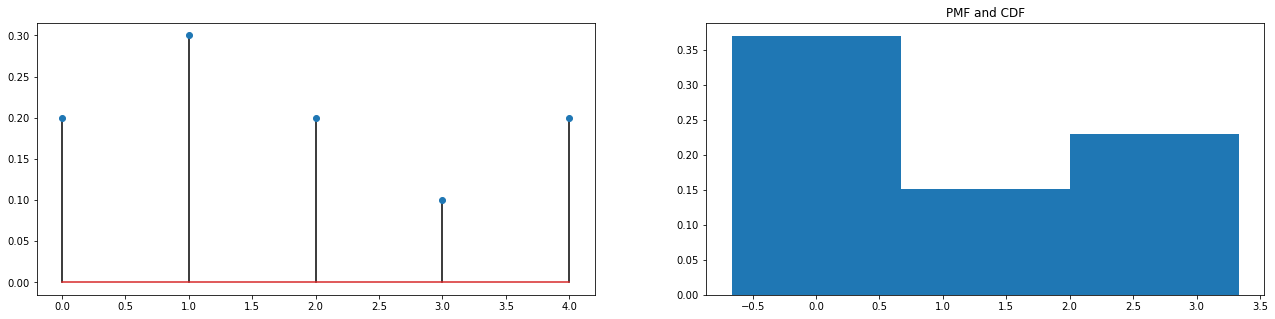

In [6]:
p = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
s = [0, 1, 2, 3, 4]
cp = np.cumsum(p)
sp_lis = np.array([])

n = 10000

for j in range(n):
    u = random.uniform(0, 1)
    for i in range(len(cp)):
        # choose the snmallest such one
        if cp[i] > u:
            sp_lis = np.append(sp_lis, s[i])
            break

fig, ax = plt.subplots(1, 2, figsize=(22, 5))
ax[0].stem(s, p, markerfmt='o', linefmt='k')
ax[1].hist(sp_lis, range(6), density=True, align='left')
plt.title("PMF and CDF")
plt.show()

### Ex1.2

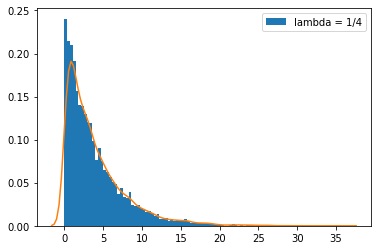

In [9]:
# choose exponential with lanmbda = 1/4
l = 1/4
samples = np.array([])
n = 10000

random.seed(1)
# from UNIF[0,1] to generate samples

for i in range(n):
    u = random.uniform(0, 1)
    x = (-1/l)*np.log(1 - u)
    samples = np.append(samples, x)

plt.hist(samples, bins=100, density=True)

# pdf
import seaborn as sns
sns.kdeplot(samples)
plt.legend(["lambda = 1/4"])
plt.show()

## sol: para setting of density and hist plotting

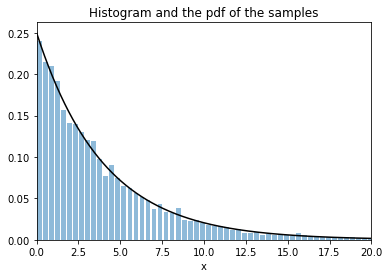

In [19]:
x = np.linspace(0, 20, 1000) # could be set after plotting the hist first
# the density of exponential
y = l*np.exp(-l*x)
plt.plot(x, y, 'k-')

# rwidth: 线条粗细; alpha: 颜色深浅
plt.hist(samples, bins=100, density=True, rwidth=0.8, alpha=0.5)

# give the graph a title, a xlabel, and xlim
plt.title("Histogram and the pdf of the samples")
plt.xlabel("x")
plt.xlim([0, 20])
plt.show()

### plotting/comparing density plots: seaborn.kdeplot

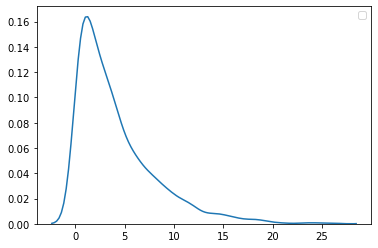

In [41]:
# pdf
import seaborn as sns
sns.kdeplot(y)
plt.legend(["lambda = 1/4"])
plt.show()

In [ ]:
# 对应折线图
hist, bins = np.histogram(y, bins=10, normed=True)
# mid-point of each bar and labelled
bin_center = (bins[1:] + bins[:-1])*0.5
plt.plot(bin_center, hist)

## Ex1.3 : BUG???!

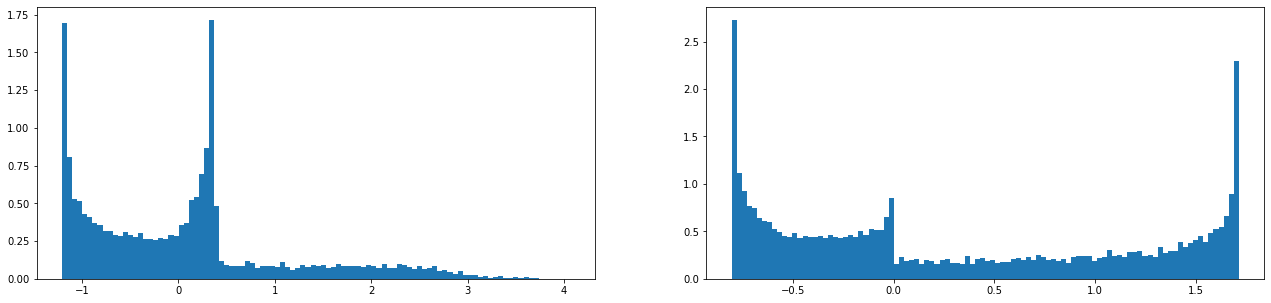

In [99]:
n = 10000
m= np.random.uniform(0, 1, n)

A = 2*np.pi*m
B = (-2*np.log(m))**0.5

x = B*np.cos(A)
y = B*np.sin(A)

fig, ax = plt.subplots(1, 2, figsize=(22, 5))
ax[0].hist(x, bins=100, density=True)
ax[1].hist(y, bins=100, density=True)
plt.show()

## 1.3 sol

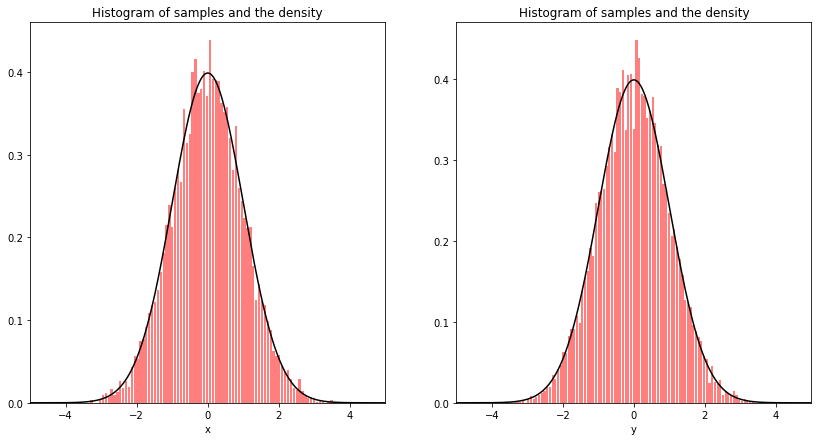

In [15]:
import numpy as np
import matplotlib .pyplot as plt

# sample from Gaussian using uniforms

n = 10000 # number of samples

x = np.array([]) # list to store samples
y = np.array([]) # list to store samples

for i in range(n):
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)
    A = 2 * np.pi * u1
    R = np.sqrt(-2 * np.log(u2))
    x = np.append(x, R * np.cos(A))
    y = np.append(y, R * np.sin(A))

# plot the histogram of the samples and the density
xx = np.linspace(-5, 5, 1000)
gauss_density = 1/np.sqrt(2 * np.pi) * np.exp(-xx**2 / 2)
fig , axs = plt.subplots(1, 2, figsize=(14 , 7))
axs[0].hist(x, bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
# the density
axs[0].plot(xx , gauss_density , 'k-')
axs[0].set_title ("Histogram of samples and the density")
axs[0].set_xlabel ("x")
axs[0].set_xlim ([-5, 5])

axs[1].hist(y, bins=100 , density=True , rwidth=0.8, color='r', alpha=0.5)
axs[1].plot(xx , gauss_density , 'k-')
axs[1].set_title ("Histogram of samples and the density")
axs[1].set_xlabel ("y")
axs[1].set_xlim ([-5, 5])
plt.show ()


In [ ]:
# set_title, set_xlabel and set_xlim
axs[0].set_title ("Histogram of samples and the density")
axs[0].set_xlabel ("x")
axs[0].set_xlim ([-5, 5])

## Ex1.4: how to 'plot' variance??

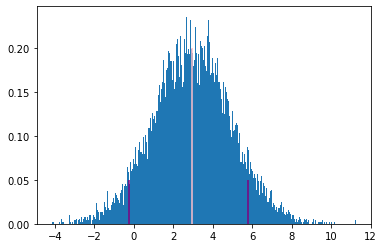

In [52]:
# generate from N(0, 1)
random.seed(2)
n = 10000
x = random.normal(0, 1, n)

mu = 3
sigma = 2

def normal_sample(n):
    for i in range(len(x)):
        x[i] = x[i]*sigma + mu
    return x

s = normal_sample(n)
plt.hist(s, bins=300, density=True)

# plot vertical lines: vlines(x, ymin, ymax, colors, label)
plt.vlines(np.mean(x), ymin=0, ymax=0.2, colors="pink")

# plot variance???
# 95% interval
i1 = 1.96*sqrt(sigma) - mu
i2 = 1.96*sqrt(sigma) + mu 
plt.vlines(i1, ymin=0, ymax=0.05, colors="purple")
plt.vlines(i2, ymin=0, ymax=0.05, colors="purple")

### Ex1.5

## shown: by Box-Muller: how to numerically express sqrt?

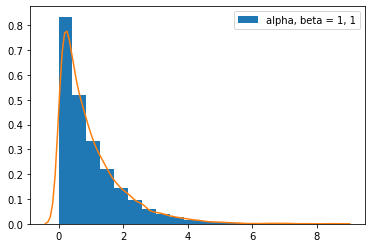

In [19]:
## by pdf of expo distri, the cdf of Weibull distri can be determined
## inverse fucntion: (log(1-x))**(1/beta)*(-alpha)

# generate from UNI(0,1)
random.seed(3)
n = 10000
x = random.uniform(0, 1, n)
a = 1
b = 1  # b should be numerically expressed

# use the inverse func
def weibull_sample(n):
    for i in range(len(x)):
        x[i] = (log(1 - x[i]))**b**(-1)*(-a)
    return x

# plot hist and pdf
w = weibull_sample(n)
plt.hist(w, bins=20, density=True)
sns.kdeplot(w)
plt.legend(["alpha, beta = 1, 1"])
plt.show()  # to display the legend


## 1.6 sol

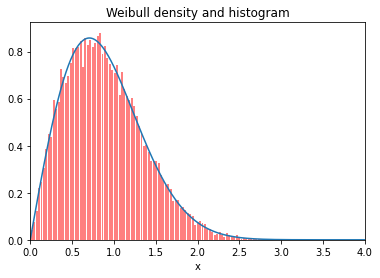

In [22]:
import numpy as np
import matplotlib .pyplot as plt

n = 20000

# sample from weibull
def weibull_density (w, a, b):
    return b * a**(-b) * w**(b-1) * np.exp(- (w / a)**b)

a = 1
b = 2

samples = np.array([]) # list to store samples

for i in range(n):
    u = np.random.uniform(0, 1)
    x = - np.log(1 - u) # inversion
    w = a * x**(1/b) # transformation
    samples = np.append(samples , w)

# plotting pdf
xx = np.linspace(0, 4, 1000)
yy = weibull_density (xx , a, b)
plt.plot(xx , yy, 'k-')

plt.hist(samples , bins=100 , density=True , rwidth=0.8, color='r', alpha
=0.5)
plt.title("Weibull density and histogram")
plt.xlabel("x")
plt.xlim([0, 4])
plt.show ()

### plotting pdf

In [ ]:
# plotting pdf
xx = np.linspace(0, 4, 1000)
  # gives the density of the target r.v
yy = weibull_density (xx , a, b)
plt.plot(xx , yy , 'k-')